In [1]:
import billboard
import pandas as pd
from datetime import date, datetime, timedelta

In [2]:
help(billboard)

Help on module billboard:

NAME
    billboard

CLASSES
    builtins.Exception(builtins.BaseException)
        BillboardNotFoundException
        BillboardParseException
    builtins.UserWarning(builtins.Warning)
        UnsupportedYearWarning
    builtins.object
        ChartData
        ChartEntry
            YearEndChartEntry
    
    class BillboardNotFoundException(builtins.Exception)
     |  Method resolution order:
     |      BillboardNotFoundException
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Data descriptors defined here:
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from builtins.Exception:
     |  
     |  __init__(self, /, *args, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  -------------------

In [3]:
chart = billboard.ChartData('hot-100')

In [4]:
chart.date

'2023-04-22'

In [5]:
chart.entries

[billboard.ChartEntry(title='Last Night', artist='Morgan Wallen'),
 billboard.ChartEntry(title='Search & Rescue', artist='Drake'),
 billboard.ChartEntry(title='Flowers', artist='Miley Cyrus'),
 billboard.ChartEntry(title='Kill Bill', artist='SZA'),
 billboard.ChartEntry(title="Creepin'", artist='Metro Boomin, The Weeknd & 21 Savage'),
 billboard.ChartEntry(title='Calm Down', artist='Rema & Selena Gomez'),
 billboard.ChartEntry(title='Die For You', artist='The Weeknd & Ariana Grande'),
 billboard.ChartEntry(title="Boy's A Liar, Pt. 2", artist='PinkPantheress & Ice Spice'),
 billboard.ChartEntry(title='Anti-Hero', artist='Taylor Swift'),
 billboard.ChartEntry(title='Ella Baila Sola', artist='Eslabon Armado X Peso Pluma'),
 billboard.ChartEntry(title='Rock And A Hard Place', artist='Bailey Zimmerman'),
 billboard.ChartEntry(title='Players', artist='Coi Leray'),
 billboard.ChartEntry(title='You Proof', artist='Morgan Wallen'),
 billboard.ChartEntry(title='Favorite Song', artist='Toosii'),


In [6]:
chart.entries[3].rank

4

In [7]:
for i in chart:
    print(i, i.rank, i.weeks)

'Last Night' by Morgan Wallen 1 11
'Search & Rescue' by Drake 2 1
'Flowers' by Miley Cyrus 3 13
'Kill Bill' by SZA 4 18
'Creepin'' by Metro Boomin, The Weeknd & 21 Savage 5 19
'Calm Down' by Rema & Selena Gomez 6 32
'Die For You' by The Weeknd & Ariana Grande 7 37
'Boy's A Liar, Pt. 2' by PinkPantheress & Ice Spice 8 10
'Anti-Hero' by Taylor Swift 9 25
'Ella Baila Sola' by Eslabon Armado X Peso Pluma 10 4
'Rock And A Hard Place' by Bailey Zimmerman 11 44
'Players' by Coi Leray 12 15
'You Proof' by Morgan Wallen 13 48
'Favorite Song' by Toosii 14 8
'Sure Thing' by Miguel 15 37
'Lavender Haze' by Taylor Swift 16 25
'La Bebe' by Yng Lvcas x Peso Pluma 17 4
'As It Was' by Harry Styles 18 54
'Thought You Should Know' by Morgan Wallen 19 35
'Thinkin' Bout Me' by Morgan Wallen 20 6
'I'm Good (Blue)' by David Guetta & Bebe Rexha 21 33
'One Thing At A Time' by Morgan Wallen 22 19
'Fast Car' by Luke Combs 23 3
'Under The Influence' by Chris Brown 24 31
'Something In The Orange' by Zach Bryan 25 

In [8]:
song = chart[0]
help(song)

Help on ChartEntry in module billboard object:

class ChartEntry(builtins.object)
 |  ChartEntry(title, artist, image, peakPos, lastPos, weeks, rank, isNew)
 |  
 |  Represents an entry (typically a single track) on a chart.
 |  
 |  Attributes:
 |      title: The title of the track.
 |      artist: The name of the track artist, as formatted on Billboard.com.
 |          If there are multiple artists and/or featured artists, they will
 |          be included in this string.
 |      image: The URL of the image for the track.
 |      peakPos: The track's peak position on the chart as of the chart date,
 |          as an int (or None if the chart does not include this information).
 |      lastPos: The track's position on the previous week's chart, as an int
 |          (or None if the chart does not include this information).
 |          This value is 0 if the track was not on the previous week's chart.
 |      weeks: The number of weeks the track has been or was on the chart,
 |        

In [9]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [10]:
# Conseguindo o valor da música mais nova no dataset de features
last_song_date = df['release_date'].max().date()
last_song_date

datetime.date(2021, 4, 16)

In [11]:
df.loc[df['popularity'] == df['popularity'].max()].artists

93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']
Name: artists, dtype: object

In [12]:
entries = pd.read_csv('data/billboard_hot_100.csv')

In [13]:
### Juntar todos os dataframes e calcular os pontos pra poder unir com o dataset de features
entries

,name,artist,rank,weeks,date
0,All I Want For Christmas Is You,Mariah Carey,1,50,2022-01-01
1,Rockin' Around The Christmas Tree,Brenda Lee,2,44,2022-01-01
2,Jingle Bell Rock,Bobby Helms,3,41,2022-01-01
3,A Holly Jolly Christmas,Burl Ives,4,25,2022-01-01
4,Easy On Me,Adele,5,11,2022-01-01
...,...,...,...,...,...
330882,Down In Virginia,Jimmy Reed,96,1,1958-08-09
330883,Sunday Barbecue,Tennessee Ernie Ford,97,1,1958-08-09
330884,Gotta Have Rain,Eydie Gorme,98,2,1958-08-09
330885,Nothing In The World,Nat King Cole,99,1,1958-08-09


In [15]:
# Agrupando as músicas que aparecem mais somando sua pontuação
sanitized_entries = entries.groupby(['name', 'artist'], as_index=False)['weeks'].agg('max').sort_values('weeks', ascending=False).reset_index(drop=True)
sanitized_entries

,name,artist,weeks
0,Blinding Lights,The Weeknd,90
1,Radioactive,Imagine Dragons,87
2,Sail,AWOLNATION,79
3,I'm Yours,Jason Mraz,76
4,How Do I Live,LeAnn Rimes,69
...,...,...,...
29760,One,Mary J. Blige,1
29761,The Magic Of Our Summer Love,The Tymes,1
29762,Same Thing,Lil Baby,1
29763,I'm Coming Home,Paul Anka,1


In [16]:
sanitized_entries.dtypes

name      object
artist    object
weeks      int64
dtype: object

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='weeks', ylabel='Count'>

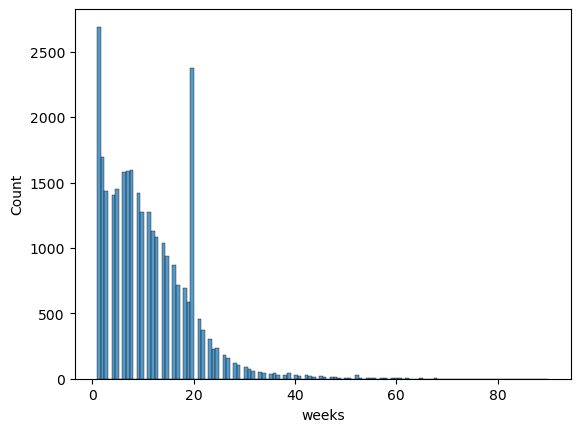

In [18]:
sns.histplot(data=sanitized_entries, x='weeks')

In [19]:
# Pelo gráfico é possível observar que a mediana é uma medida de centralização muito melhor 
# que a média neste caso.
sanitized_entries['weeks'].median()

10.0

In [20]:
# Coluna de artistas é uma string e não uma lista de strings
df.dtypes

id                          object
name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

In [21]:
# Tratando a string como lista
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [22]:

df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernando Pessoa
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Ignacio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Ignacio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Haymes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,阿YueYue
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNEAS
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,Gentle Bones


In [23]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes, portanto é necessario filtra-las
merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,Carve,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,Uli,NaN
1,Capítulo 2.16 - Banquero Anarquista,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,Fernando Pessoa,NaN
2,Vivo para Quererte - Remasterizado,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,Ignacio Corsini,NaN
3,El Prisionero - Remasterizado,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,Ignacio Corsini,NaN
4,Lady of the Evening,163080,0,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,Dick Haymes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523461,Skyscraper,106002,0,2020-02-08,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,Emilie Chin,NaN
523462,云与海,258267,0,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,阿YueYue,NaN
523463,blind,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,ROLE MODEL,NaN
523464,What They'll Say About Us,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,FINNEAS,NaN


In [24]:
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,0.67300,0.353000,0.3380,0.247,130.503,Bing Crosby,24.0
1,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,0.44600,0.000011,0.1030,0.493,79.855,Bill Withers,16.0
2,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,0.64600,0.000000,0.2840,0.620,202.481,Bing Crosby,1.0
3,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,0.28100,0.000000,0.2560,0.176,84.041,Bing Crosby,1.0
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950-01-01,0.712,0.856,2,-9.457,1,0.0332,0.63600,0.000000,0.1680,0.934,97.431,Mitch Miller,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,I Love It,156773,0,2012-01-01,0.710,0.901,1,-2.686,1,0.0296,0.00828,0.000013,0.1720,0.860,125.953,Icona Pop,29.0
10039,Ricky,154693,0,1988-10-18,0.525,0.668,4,-12.278,1,0.0920,0.06270,0.000000,0.4430,0.973,153.811,"""Weird Al"" Yankovic",8.0
10040,Love At First Sight,276440,0,1990-01-01,0.620,0.608,10,-8.665,1,0.0294,0.31800,0.000000,0.0809,0.566,115.826,Styx,16.0
10041,Waiting For Love,278173,0,1990-01-01,0.615,0.537,7,-10.728,1,0.0282,0.27800,0.000000,0.1640,0.494,111.581,Alias,17.0


In [25]:
total_in_billboard = len(billboard_entries_df)
total_in_billboard

10043

In [26]:
sanitized_merged_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
sanitized_merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,Carve,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,Uli,NaN
1,Capítulo 2.16 - Banquero Anarquista,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,Fernando Pessoa,NaN
2,Vivo para Quererte - Remasterizado,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,Ignacio Corsini,NaN
3,El Prisionero - Remasterizado,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,Ignacio Corsini,NaN
4,Lady of the Evening,163080,0,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,Dick Haymes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513418,Skyscraper,106002,0,2020-02-08,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,Emilie Chin,NaN
513419,云与海,258267,0,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,阿YueYue,NaN
513420,blind,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,ROLE MODEL,NaN
513421,What They'll Say About Us,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,FINNEAS,NaN


In [27]:
samples_df = sanitized_merged_df.sample(n=total_in_billboard)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
303334,Diosa Razón,256000,0,1983-09-01,0.478,0.722,9,-10.547,0,0.0433,0.30000,0.817000,0.3920,0.661,140.396,Barón Rojo,NaN
48356,002 - und der Phantomsee - Teil 31,70920,0,1979-01-02,0.762,0.545,2,-9.583,1,0.9410,0.69100,0.000000,0.7240,0.391,73.742,Die drei ???,NaN
273682,Pas Oublié (feat. Gilli),179714,0,2020-02-28,0.745,0.557,8,-5.995,1,0.0469,0.01390,0.000000,0.0819,0.395,105.034,Isaac Kasule,NaN
454308,The Wizard (2017 - Remaster),182053,0,1972-05-19,0.416,0.676,5,-9.733,1,0.0439,0.00335,0.000011,0.4900,0.626,137.884,Uriah Heep,NaN
398714,Naar De Kermis,200640,0,1995-01-01,0.860,0.536,5,-10.070,1,0.0320,0.23300,0.000000,0.0624,0.968,127.194,Ronnie Tober,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169466,Amarte a ti,217800,0,1983-06-10,0.652,0.385,0,-12.355,1,0.0293,0.70600,0.000016,0.0894,0.491,132.276,Wilkins,NaN
369543,Domnisoare (feat. Zhao & Spike),229493,0,2013-10-21,0.826,0.668,2,-6.805,0,0.1010,0.01860,0.000070,0.2760,0.900,127.991,Maximilian,NaN
215263,Takin' Back My Love,230427,0,2008-01-01,0.739,0.750,6,-4.778,0,0.0339,0.01370,0.000010,0.1580,0.431,124.958,Enrique Iglesias,NaN
293191,Be Natural,280451,0,2014-10-13,0.580,0.868,10,-1.195,0,0.3160,0.12300,0.000000,0.3020,0.772,178.002,Red Velvet,NaN


In [106]:
concatenated_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
# concatenated_df.columns
concatenated_df['weeks'].fillna(0, inplace=True)
concatenated_df["release_date"] = concatenated_df["release_date"].dt.year
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,White Christmas,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.6730,0.353000,0.3380,0.247,130.503,Bing Crosby,24.0
1,Ain't No Sunshine,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.4460,0.000011,0.1030,0.493,79.855,Bill Withers,16.0
2,Mele Kalikimaka (Merry Christmas),175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.6460,0.000000,0.2840,0.620,202.481,Bing Crosby,1.0
3,I'll Be Home For Christmas,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.2810,0.000000,0.2560,0.176,84.041,Bing Crosby,1.0
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.6360,0.000000,0.1680,0.934,97.431,Mitch Miller,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,Amarte a ti,217800,0,1983,0.652,0.385,0,-12.355,1,0.0293,0.7060,0.000016,0.0894,0.491,132.276,Wilkins,0.0
20082,Domnisoare (feat. Zhao & Spike),229493,0,2013,0.826,0.668,2,-6.805,0,0.1010,0.0186,0.000070,0.2760,0.900,127.991,Maximilian,0.0
20083,Takin' Back My Love,230427,0,2008,0.739,0.750,6,-4.778,0,0.0339,0.0137,0.000010,0.1580,0.431,124.958,Enrique Iglesias,0.0
20084,Be Natural,280451,0,2014,0.580,0.868,10,-1.195,0,0.3160,0.1230,0.000000,0.3020,0.772,178.002,Red Velvet,0.0


In [107]:
filtered_data = concatenated_df[concatenated_df['weeks'] != 0]

# Get the count of songs with weeks different than 0 for each artist
song_count = filtered_data['artist'].value_counts()
song_count

Drake                         91
Taylor Swift                  82
Justin Bieber                 52
The Weeknd                    42
Stevie Wonder                 42
                              ..
The Friends Of Distinction     1
Zendaya                        1
MAGIC!                         1
Herbie Mann                    1
Krewella                       1
Name: artist, Length: 2920, dtype: int64

<AxesSubplot:>

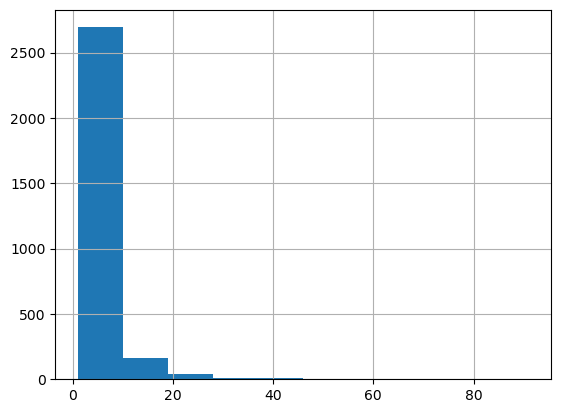

In [108]:
song_count.hist()

In [109]:
# Function to define categories for number of songs that an artist has in the billboard if any
def get_category(x):
    if x > 20:
        return 'Superstar'
    elif x > 10:
        return "Trendsetting"
    elif x > 5:
        return "Hitmaker"
    elif x > 3:
        return "Notable"
    else:
        return "Newcomer"

## Hit song approach

In [110]:
get_category(song_count['Drake'])

'Superstar'

In [113]:
hit_song_df = concatenated_df.copy()
### if it appears once in billboard hot 100 then it's a hit
hit_song_df['hit'] = hit_song_df['weeks'].apply(lambda x: 1 if x else 0)

# hit_song_df['artist'] = hit_song_df['weeks'].apply(get_category)

# Function to get the category of the artist
def get_artist_category(row, song_count=song_count):
    if row['artist'] not in song_count.index:
        return 'Unknown'
    else:
        return get_category(song_count[row['artist']])

hit_song_df['artist_category'] = hit_song_df.apply(lambda x: get_artist_category(x), axis=1)

# dummiees for most successful artists
artist_dummies = pd.get_dummies(hit_song_df['artist_category'])
hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist", "artist_category"])
# hit_song_df['artist_category'].value_counts()
hit_song_df

,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.6730,0.353000,0.3380,0.247,130.503,1
1,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.4460,0.000011,0.1030,0.493,79.855,1
2,175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.6460,0.000000,0.2840,0.620,202.481,1
3,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.2810,0.000000,0.2560,0.176,84.041,1
4,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.6360,0.000000,0.1680,0.934,97.431,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,217800,0,1983,0.652,0.385,0,-12.355,1,0.0293,0.7060,0.000016,0.0894,0.491,132.276,0
20082,229493,0,2013,0.826,0.668,2,-6.805,0,0.1010,0.0186,0.000070,0.2760,0.900,127.991,0
20083,230427,0,2008,0.739,0.750,6,-4.778,0,0.0339,0.0137,0.000010,0.1580,0.431,124.958,0
20084,280451,0,2014,0.580,0.868,10,-1.195,0,0.3160,0.1230,0.000000,0.3020,0.772,178.002,0


In [114]:
hit_song_X = hit_song_df.drop('hit', axis=1)
hit_song_y = hit_song_df['hit']
hit_song_X

,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.6730,0.353000,0.3380,0.247,130.503
1,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.4460,0.000011,0.1030,0.493,79.855
2,175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.6460,0.000000,0.2840,0.620,202.481
3,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.2810,0.000000,0.2560,0.176,84.041
4,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.6360,0.000000,0.1680,0.934,97.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,217800,0,1983,0.652,0.385,0,-12.355,1,0.0293,0.7060,0.000016,0.0894,0.491,132.276
20082,229493,0,2013,0.826,0.668,2,-6.805,0,0.1010,0.0186,0.000070,0.2760,0.900,127.991
20083,230427,0,2008,0.739,0.750,6,-4.778,0,0.0339,0.0137,0.000010,0.1580,0.431,124.958
20084,280451,0,2014,0.580,0.868,10,-1.195,0,0.3160,0.1230,0.000000,0.3020,0.772,178.002


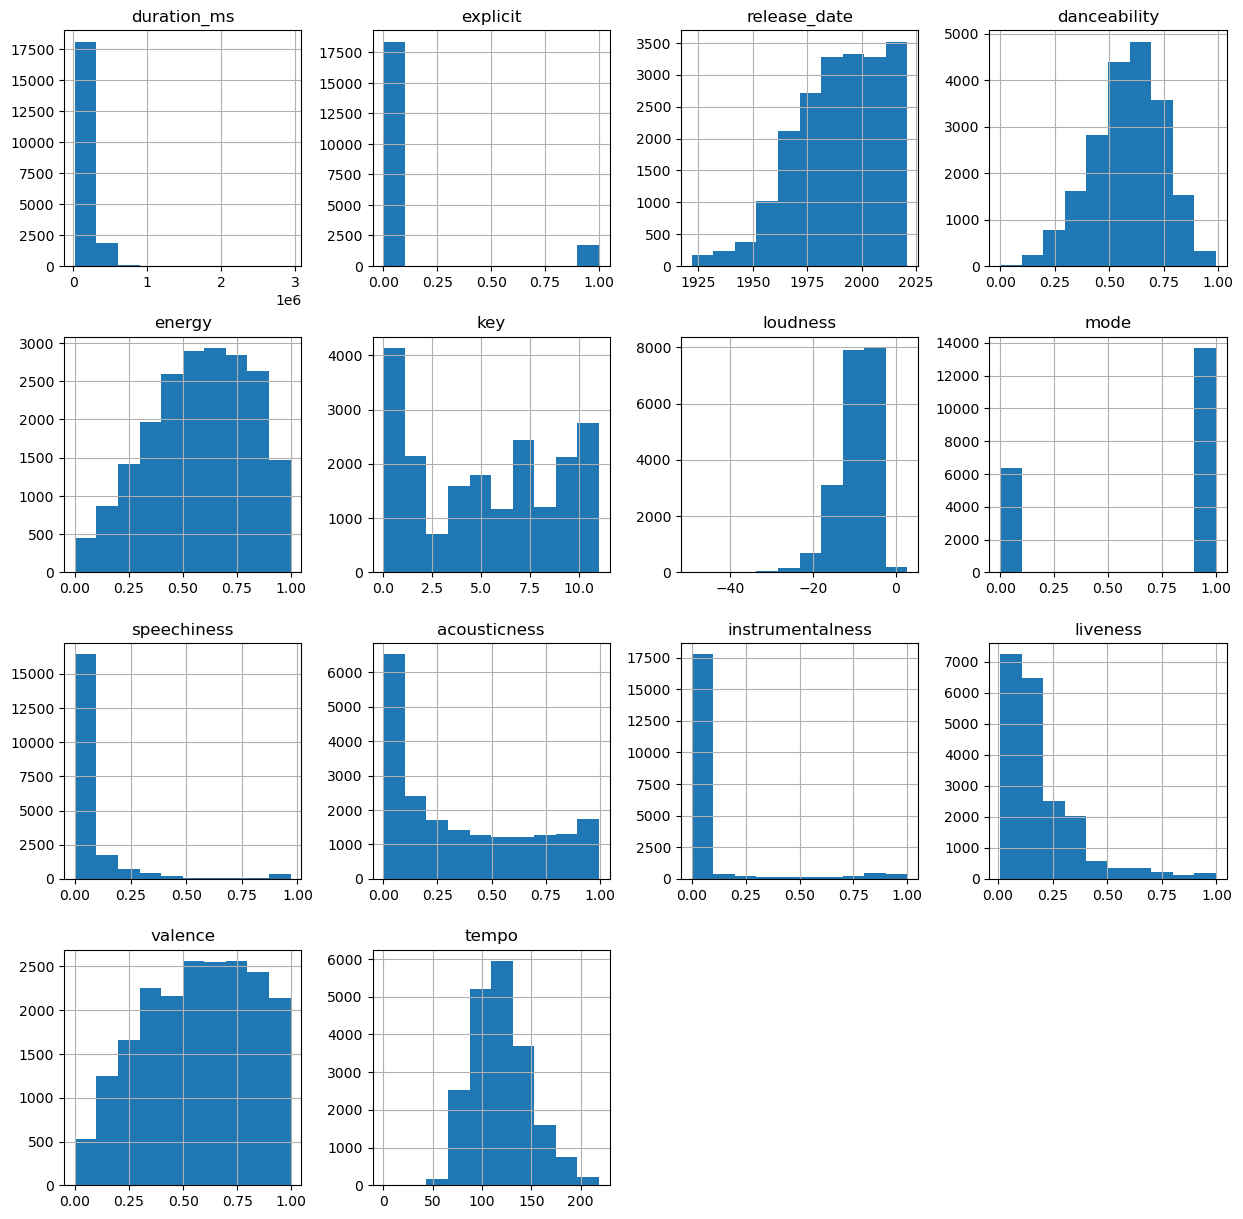

In [115]:
_ = pd.DataFrame.hist(data=hit_song_X, figsize=[15,15])

### Checking correlation so that we can drop features to prevent dimensionality curse

<AxesSubplot:>

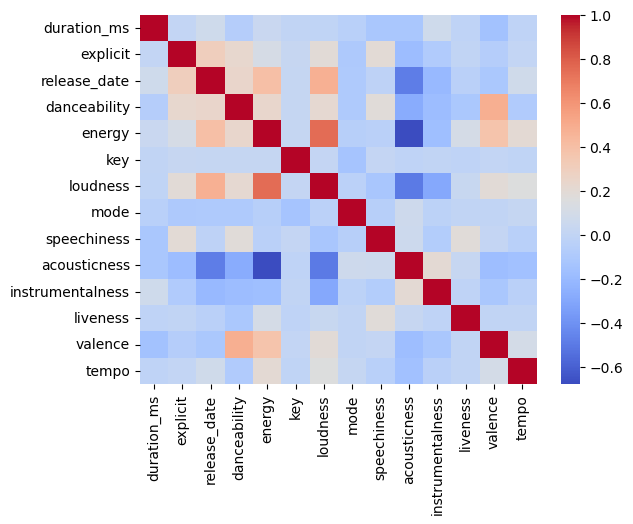

In [116]:
correlation_matrix = hit_song_X.corr()
import seaborn as sns

sns.heatmap(correlation_matrix, cmap="coolwarm")

In [117]:
corr_matrix = correlation_matrix[correlation_matrix != 1.0].dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs by their absolute value in descending order
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_pairs

loudness          energy              0.748839
energy            loudness            0.748839
acousticness      energy              0.678710
energy            acousticness        0.678710
acousticness      loudness            0.498401
                                        ...   
                  acousticness             NaN
instrumentalness  instrumentalness         NaN
liveness          liveness                 NaN
valence           valence                  NaN
tempo             tempo                    NaN
Length: 196, dtype: float64

In [118]:
# dropping one of the correlated features that has a correlation coefficient of 0.7 or higher
# hit_song_X = hit_song_X.drop(columns=['loudness'])

In [119]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
selector = SelectKBest(score_func=mutual_info_classif, k=20)
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2023)


In [120]:
# Testing adding artists again
hit_song_X = pd.concat([hit_song_X, artist_dummies], axis=1)
hit_song_X

,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Hitmaker,Newcomer,Notable,Superstar,Trendsetting,Unknown
0,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.6730,0.353000,0.3380,0.247,130.503,0,1,0,0,0,0
1,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.4460,0.000011,0.1030,0.493,79.855,1,0,0,0,0,0
2,175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.6460,0.000000,0.2840,0.620,202.481,0,1,0,0,0,0
3,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.2810,0.000000,0.2560,0.176,84.041,0,1,0,0,0,0
4,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.6360,0.000000,0.1680,0.934,97.431,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,217800,0,1983,0.652,0.385,0,-12.355,1,0.0293,0.7060,0.000016,0.0894,0.491,132.276,0,0,0,0,0,1
20082,229493,0,2013,0.826,0.668,2,-6.805,0,0.1010,0.0186,0.000070,0.2760,0.900,127.991,0,0,0,0,0,1
20083,230427,0,2008,0.739,0.750,6,-4.778,0,0.0339,0.0137,0.000010,0.1580,0.431,124.958,0,0,0,0,1,0
20084,280451,0,2014,0.580,0.868,10,-1.195,0,0.3160,0.1230,0.000000,0.3020,0.772,178.002,0,0,0,0,0,1


In [121]:
zR = DummyClassifier()

steps_zR = [('scaler', scaler), ('estimator', zR)]
pipeline_zR = Pipeline(steps_zR)
scores_zR = cross_val_score(pipeline_zR, hit_song_X, hit_song_y, cv=rkf, scoring='accuracy')
mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, 
                               scale=std_zR/np.sqrt(len(scores_zR)))

print('zR')
print(f'Mean Accuracy: {mean_zR:.2f} Standard Deviation: {std_zR:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_zR, sup_zR)) 

zR
Mean Accuracy: 0.50 Standard Deviation: 0.00
Accuracy Confidence Interval (95%): (0.50, 0.50)



### Decision Tree

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
steps_dt = [('scaler', scaler), ('estimator', dt)]
pipeline_dt = Pipeline(steps_dt)
grid_dt = {'estimator__max_depth': [None, 3, 5, 10]}
gs_dt = GridSearchCV(estimator=pipeline_dt, param_grid = grid_dt, 
                  scoring='accuracy', cv = 4)

scores_dt = cross_val_score(gs_dt, hit_song_X, hit_song_y, scoring='accuracy', 
                         cv = rkf)

mean_dt = scores_dt.mean()
std_dt = scores_dt.std()
inf_dt, sup_dt = stats.norm.interval(0.95, loc=mean_dt, 
                               scale=std_dt/np.sqrt(len(scores_dt)))


print('DT')
print(f'Mean Accuracy: {mean_dt:.2f} Standard Deviation: {std_dt:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_dt, sup_dt)) 

/home/philipe/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/philipe/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/philipe/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/philipe/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  

KeyboardInterrupt: 

### Gaussian Naive Bayes

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


## Score approach

###

In [95]:
# Drop duplicate rows based on artist and name columns
merged_df.drop_duplicates(subset=['artist', 'name_left'], keep='first', inplace=True)

KeyError: Index(['name_left'], dtype='object')

In [ ]:
# Drop the right name column
merged_df.drop('name_right', axis=1, inplace=True)

### To-do:
- Aplicação de modelos e validação cruzada